# WordCloud Basics

In [19]:
with open('Course-Descriptions.txt' , 'r') as file:
    filecontent = file.read()

In [20]:
# display the first 100 words
filecontent[0:100]

'In this practical, hands-on course, learn how to do data preparation, data munging, data visualizati'

In [21]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)

In [22]:
wordcloud = WordCloud(stopwords = stopwords , max_words = 25  , background_color = 'white').generate(filecontent)

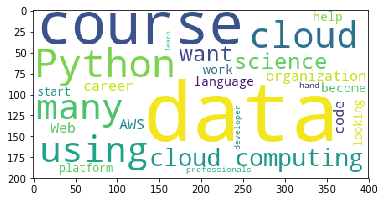

In [23]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.show()

In [24]:
# Removing unnecessary words

stopwords.update(['word' , 'want' , 'using' , 'value'] )

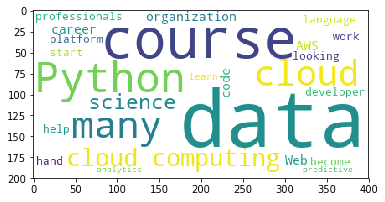

In [25]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords = stopwords , max_words = 25  , background_color = 'white').generate(filecontent)
plt.imshow(wordcloud)
plt.show()

# Sentiment Analysis using NLTK's TextBlob

In [26]:
with open('Movie-Reviews.txt' , 'r') as file:
    filecontent = file.read().split('\n')

In [27]:
# For sentiment analysis, we will use the TextBlob package from NLTK which provides out-of-the-box sentiment analysis capabilities.

In [28]:
from textblob import TextBlob

print('{:40} : {:10} : {:10}'.format("Review" , "Polarity" , "Subjectivity"))

for review in filecontent:
    sentiment = TextBlob(review)
    print('{:40} : {:10} : {:10}'.format(review[:40] , round(sentiment.polarity,3) , round(sentiment.subjectivity,3)))
    
#  Polarity shows the sentiment of the text. A positive value of polarity shows a positive review, a negative value represents a 
#  negative review, while a value of 0 shows that the text is neutral


Review                                   : Polarity   : Subjectivity
When your main character in a superhero  :      0.167 :      0.333
Her performance was forced, uninspiring  :      -0.11 :      0.108
I couldn't believe how boring this movie :     -0.508 :      0.721
Nothing beats a good marvel movie, and t :        0.7 :        0.6
This movie did for Marvel what Wonder Wo :        0.6 :      0.675
Captain Marvel just became my favorite s :        0.4 :      0.637
This is a very controversial Marvel film :      0.358 :      0.625
Unfortunately, despite carrying many ele :     -0.142 :      0.477
It's worth watching just for the fact th :        0.3 :        0.1
It's great for a first time viewing. Wou :      0.377 :      0.515


Final Count of reviews  [2, 6, 2]


([<matplotlib.patches.Wedge at 0x253e5cd5240>,
 [Text(-1.0973204560042247, 0.0767321108446827, 'Negative'),
  Text(0.8426489536312033, -0.7070662917607078, 'Neutral'),
  Text(-0.26611427502702273, 1.0673252515643215, 'Positive')],
 [Text(-0.5985384305477588, 0.041853878642554194, '20.0%'),
  Text(0.4596267019806563, -0.38567252277856784, '60.0%'),
  Text(-0.14515324092383056, 0.5821774099441753, '20.0%')])

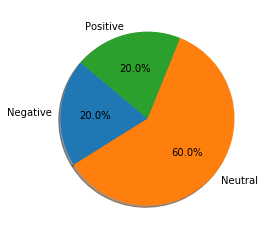

In [29]:
labels = ["Negative" , "Neutral" , "Positive"]

sentiment_count = [0 , 0 , 0]

for review in filecontent:
    sentiment = TextBlob(review)
    
    polarity = round((sentiment.polarity + 1)*3) % 3
    
    sentiment_count[polarity] = sentiment_count[polarity] + 1

print("Final Count of reviews " , sentiment_count)
    
colors = ["Green" , "Blue" , "Red"]

plt.pie(sentiment_count , labels = labels , autopct = '%1.1f%%' , shadow = True , startangle = 140)

# Clustering

In [30]:
import pandas as pd

df = pd.read_csv("Course-Hashtags.csv")

course_list = df['Course'].tolist()
tag_list = df['HashTags'].tolist()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorized = vectorizer.fit_transform(tag_list)
print(vectorizer.get_feature_names())

['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


In [31]:
# Use k-means clustering

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3).fit(vectorized)

clusters = kmeans.labels_

for label in set(clusters):
    print("\n Label (Group):  " , label)
    
    for i in df.index:
        if(clusters[i] == label):
            print(course_list[i])



 Label (Group):   0
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

 Label (Group):   1
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting

 Label (Group):   2
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science


Finding optimal cluster size using Elbow Method

Text(0.5, 1.0, 'Elbow Method')

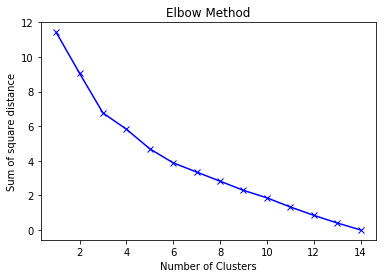

In [33]:
sosd = [] # sum of square distances

K = range(1,15)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(vectorized)
    sosd.append(kmeans.inertia_)


plt.plot(K , sosd , 'bx-')
plt.xlabel('Number of Clusters')    
plt.ylabel('Sum of square distance')
plt.title('Elbow Method')

# Text Classification

In [46]:
#preprocessing

with open('Course-Descriptions.txt' , 'r') as file:
    description = file.read().split('\n')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer



def preprocess(string):
    tokens = nltk.word_tokenize(string)
    stopwords_removal = list(filter(lambda token : token not in stopwords.words('english'), tokens))
    lemmatize = [lemmatizer.lemmatize(word) for word in stopwords_removal]
    return lemmatize


vectorizer = TfidfVectorizer(tokenizer = preprocess)
tfidf = vectorizer.fit_transform(description)
print("Some feature names identifed are: " , vectorizer.get_feature_names()[0:10])

[nltk_data] Downloading package stopwords to C:\Users\user
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\user
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Some feature names identifed are:  ["'ll", "'re", "'s", '(', ')', ',', '.', '?', 'actively', 'adopting']


In [63]:
# Naive-Bayes Classification
with open('Course-Classification.txt' , 'r') as labels:
    labels = labels.read().split('\n')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

print("Unique Labels are: " , le.classes_)

classes = le.transform(labels)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


x_train , x_test , y_train , y_test = train_test_split(tfidf , classes , random_state = 0)

classifier = MultinomialNB().fit(x_train , y_train)

Unique Labels are:  ['Cloud-Computing' 'Data-Science' 'Programming']


In [71]:
# Predictions

from sklearn import metrics

print("Predicting with Text data ************************************")


predictions = classifier.predict(x_test)

print("\nConfusion Matrix:-")
print(metrics.confusion_matrix(y_test , predictions))

print('\n Test Accuracy\n')
print(metrics.accuracy_score(y_test , predictions))

Predicting with Text data ************************************

Confusion Matrix:-
[[0 0 2]
 [0 0 1]
 [0 0 3]]

 Test Accuracy

0.5


# Predictive Text

In [78]:
with open('Course-Descriptions.txt' , 'r') as file:
    description = file.read()
import nltk
tokens = nltk.word_tokenize(description)

tokens_without_spchars = [word.replace("'" , "") for word in tokens] # remove special characters

remove_punctuation = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct , tokens_without_spchars))

tokens = [word.lower() for word in remove_punctuation]

print("Total Tokens are: " , len(tokens))

Total Tokens are:  579
